### 변수형 독립변수와 실수 독립변수의 상호작용

1. 상수 값 뿐만 아니라 다른 독립변수들이 미치는 영향도 달라지는 모형
 
 - $\hat y = w_0 + w_1x_1 \cdot w_2x_2$
 
      - $x_1 =A, d_A = 1, d_B = 0 \rightarrow \hat y = w_0 + w_{2A}x_2$
      - $x_1 =B, d_A = 0, d_B = 1 \rightarrow \hat y = w_0 + w_{2B}x_2$
  
  
 
2. 범주형 독립변수, 종속변수에 영향을 미치고 범주형 독립변수와 실수 독립변수의 상호작용도 종속변수에 영향을 미치는 모형
 
 - $\hat y = w_1x_1 + w_{12}x_1 \cdot w_2x_2$
 
      - $x_1 =A, d_A = 1, d_B = 0 \rightarrow \hat y = w_0 + w_{2A}x_2$
      - $x_1 =B, d_A = 0, d_B = 1 \rightarrow \hat y = w_0 + w_{2B}x_2$ 

   $\rightarrow x_1$ 범주값에 따라 $x_2$의 기울기가 달라짐

---
### 부분회귀
$(y = w_1x_1 + e) \ne (y = w'_1x_1 + w'_2x_2 + e')$ 

 - 일반적으로 $w'_1$의 값은 원래의 $w_1$의 값과 다르다.
 
----
 **종속변수에 영향을 미치는 모든 독립변수를 회귀모형에 포함하지 않는 한 모형의 가중치는 항상 biased된 값이 된다.**
 
---

 - 새로운 독립변수 그룹 $X_2$를 추가해서 다시 회귀분석을 하면 기존 가중치 벡터의 값이 달라진다. 
 
 1) $w'_2 = 0, X_2와 y$의 상관관계가 없는 경우
 
 2) $X_1^TX_2 = 0$ , 독립변수 $X_1$과 독립변수 $X_2$가 직교하는 경우 
 
  - 서로 상관관계가 없으면 직교할 가능성이 높다. 
  
  
---- 
#### 프리슈워로벨 정리 (Frisch-Waugh-Lovell _ FWL)

 1) 특정한 독립변수 그룹 $X_1$로 종속변수 $y$를 선형 회귀분석하여 잔차 $y^*$를 구한다. 
 
 2) $X_1$로 다른 독립변수 $x_2$를 선형회귀분석하여 나온 잔차 $x_2^*$를 구한다. 
 
 3) $y^*$를 종속변수로 하고 $x_2^*$를 독립변수로 하여 나온 선형 회귀분석하여 구한 가중치는 $X_1과 x_2$를 모두 사용하여 $y$를 선형회귀분석하였을 때 $x_2$에 대한 가중치와 같다.
 
 
--- 
#### 부분회귀 플롯 ( Partial Regression Plot)

In [24]:
model_boston = sm.OLS(dfy,dfX)
result_boston = model_boston.fit()

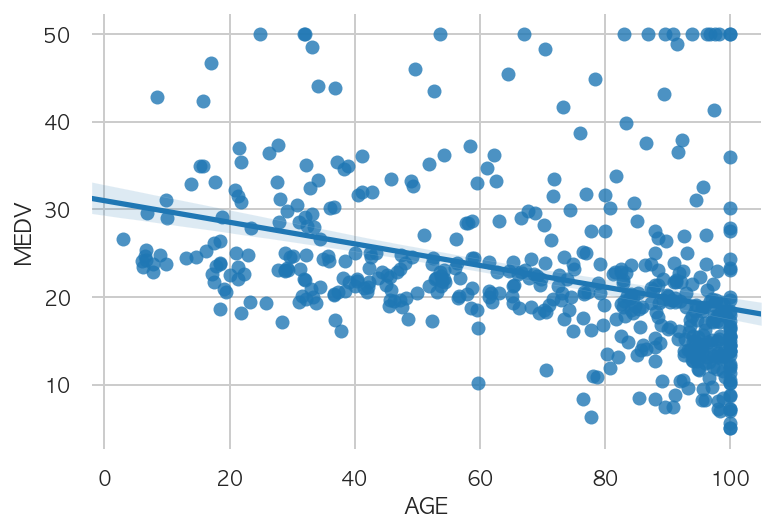

In [27]:
sns.regplot(x = "AGE", y = "MEDV", data =df)
plt.grid()
plt.show()

- 'AGE', 'MEDV'만을 가지고 scatter plot 을 그리면 음의 상관관계를 갖는다. 

**sm.graphics.plot_partregress**

- endog : 종속변수 문자열
- exog_i : 분석 대상이 되는 독립변수 문자열
- exog_othrs : 나머지 독립변수 문자열의 리스트
- data =None : 모든 데이터가 있는 데이터 프레임
- obs_labels = True : 데이터 라벨링 여부
- ret_coords=False : 잔차 데이터 반환 여부

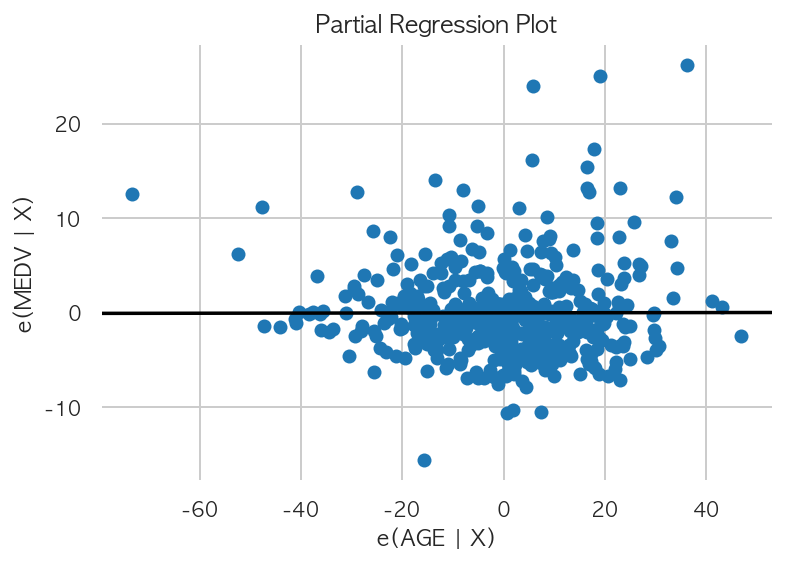

In [37]:
others = list(set(df.columns).difference(set(["MEDV","AGE"])))
p, resids = sm.graphics.plot_partregress(
    "MEDV", "AGE",others, data=df , obs_labels = False, ret_coords = True
)
plt.grid()
plt.show()

**sm.graphics.plot_partregress_grid**

- result : 회귀분석 결과 객체
- fig : plt.figure 객체

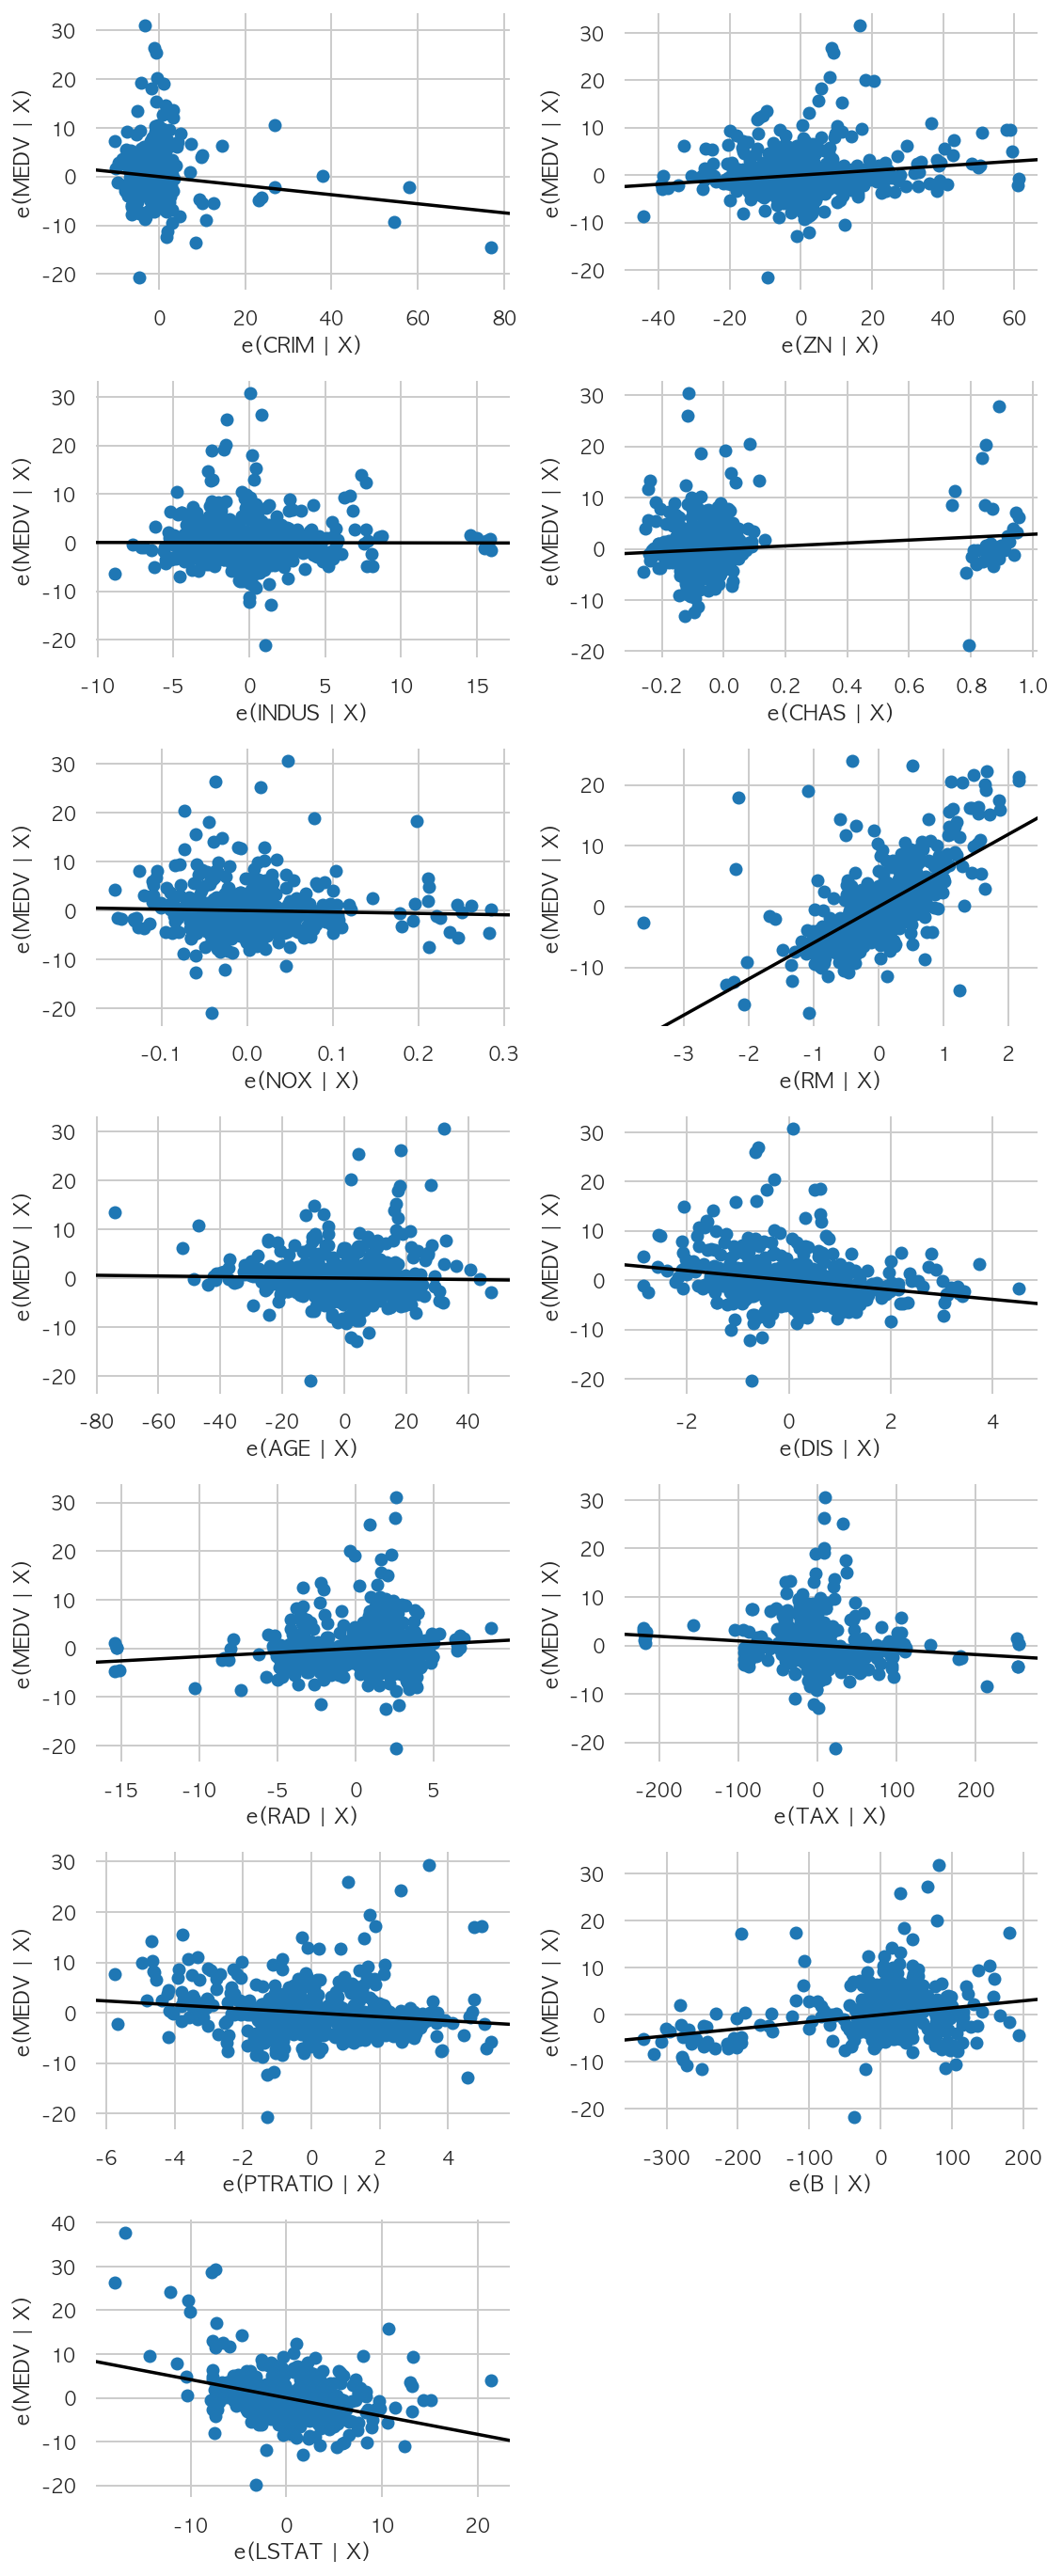

In [41]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

--- 
#### CCPR plot

 $x_i$ 를 가로축으로 
 
 $w_ix_i + e$를 세로축으로 그린 plot
 
----
 **sm.graphics.plot_ccpr**
 
  - result : 회귀분석 결과 객체
  - exog_idx : 분석 대상이 되는 독립변수 문자열

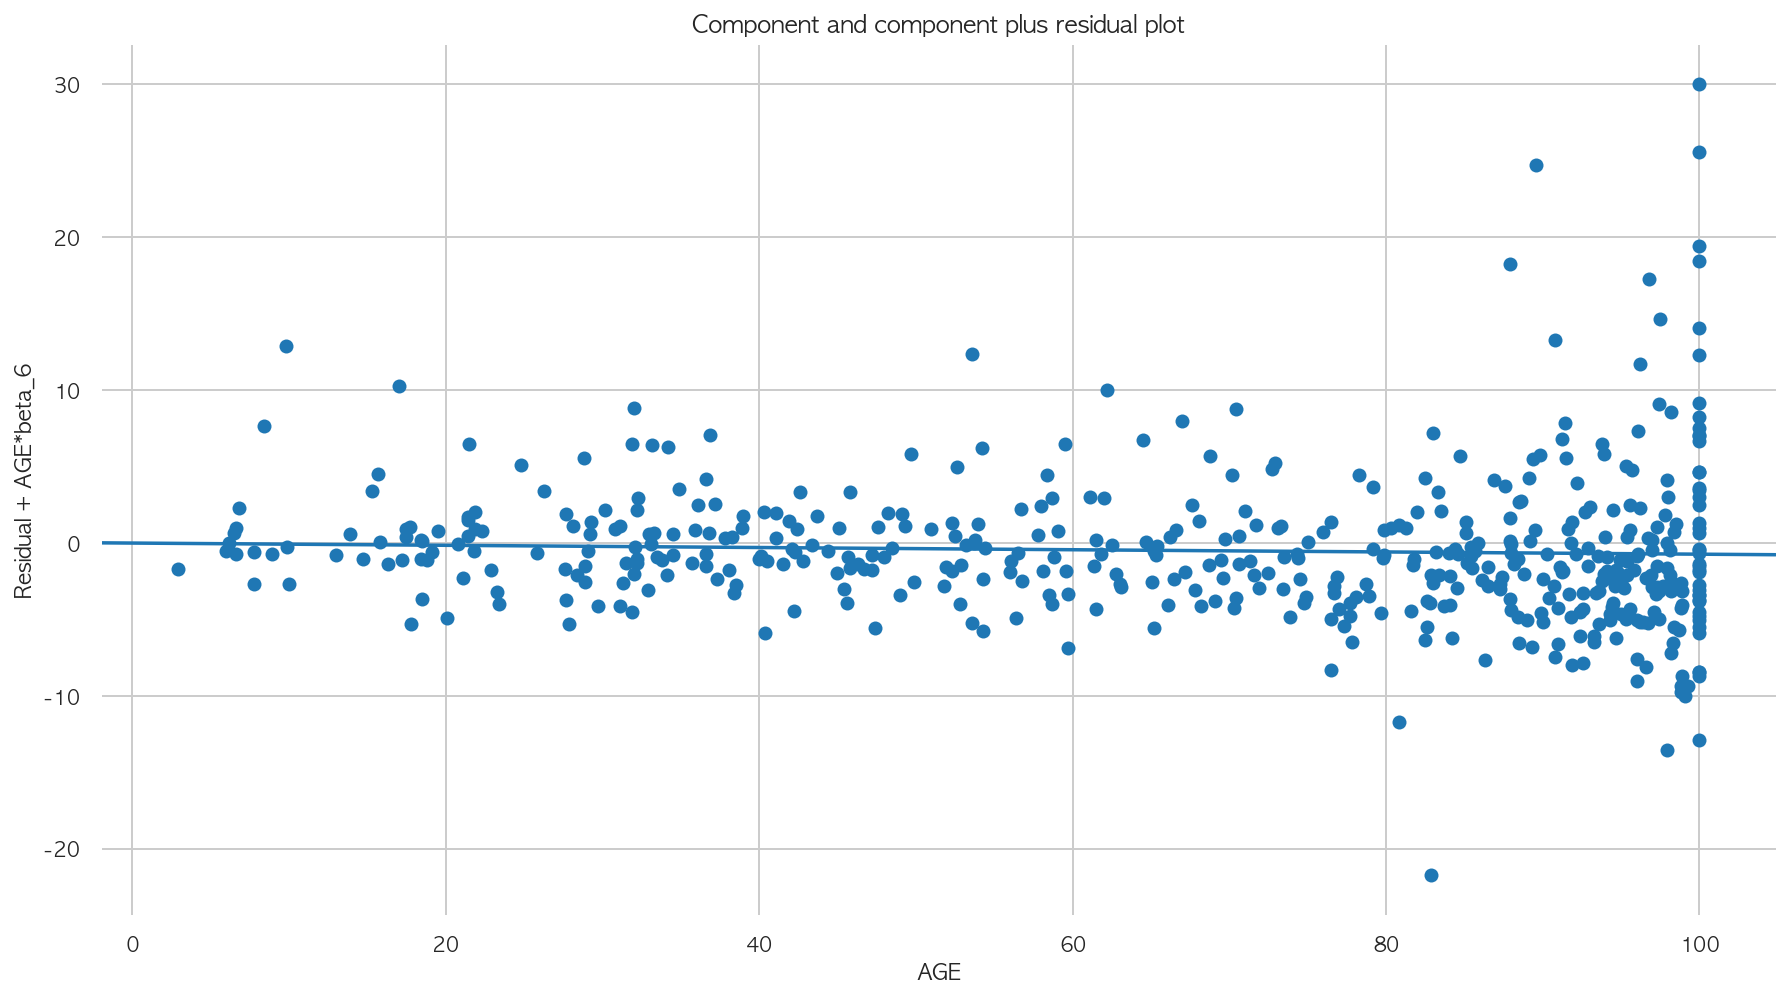

In [42]:
sm.graphics.plot_ccpr(result_boston, "AGE")
plt.show()

--- 
**sm.graphics.plot_ccpr_grid**

 - result : 회귀분석 결과 객체
 - fig : plt.figure 객체

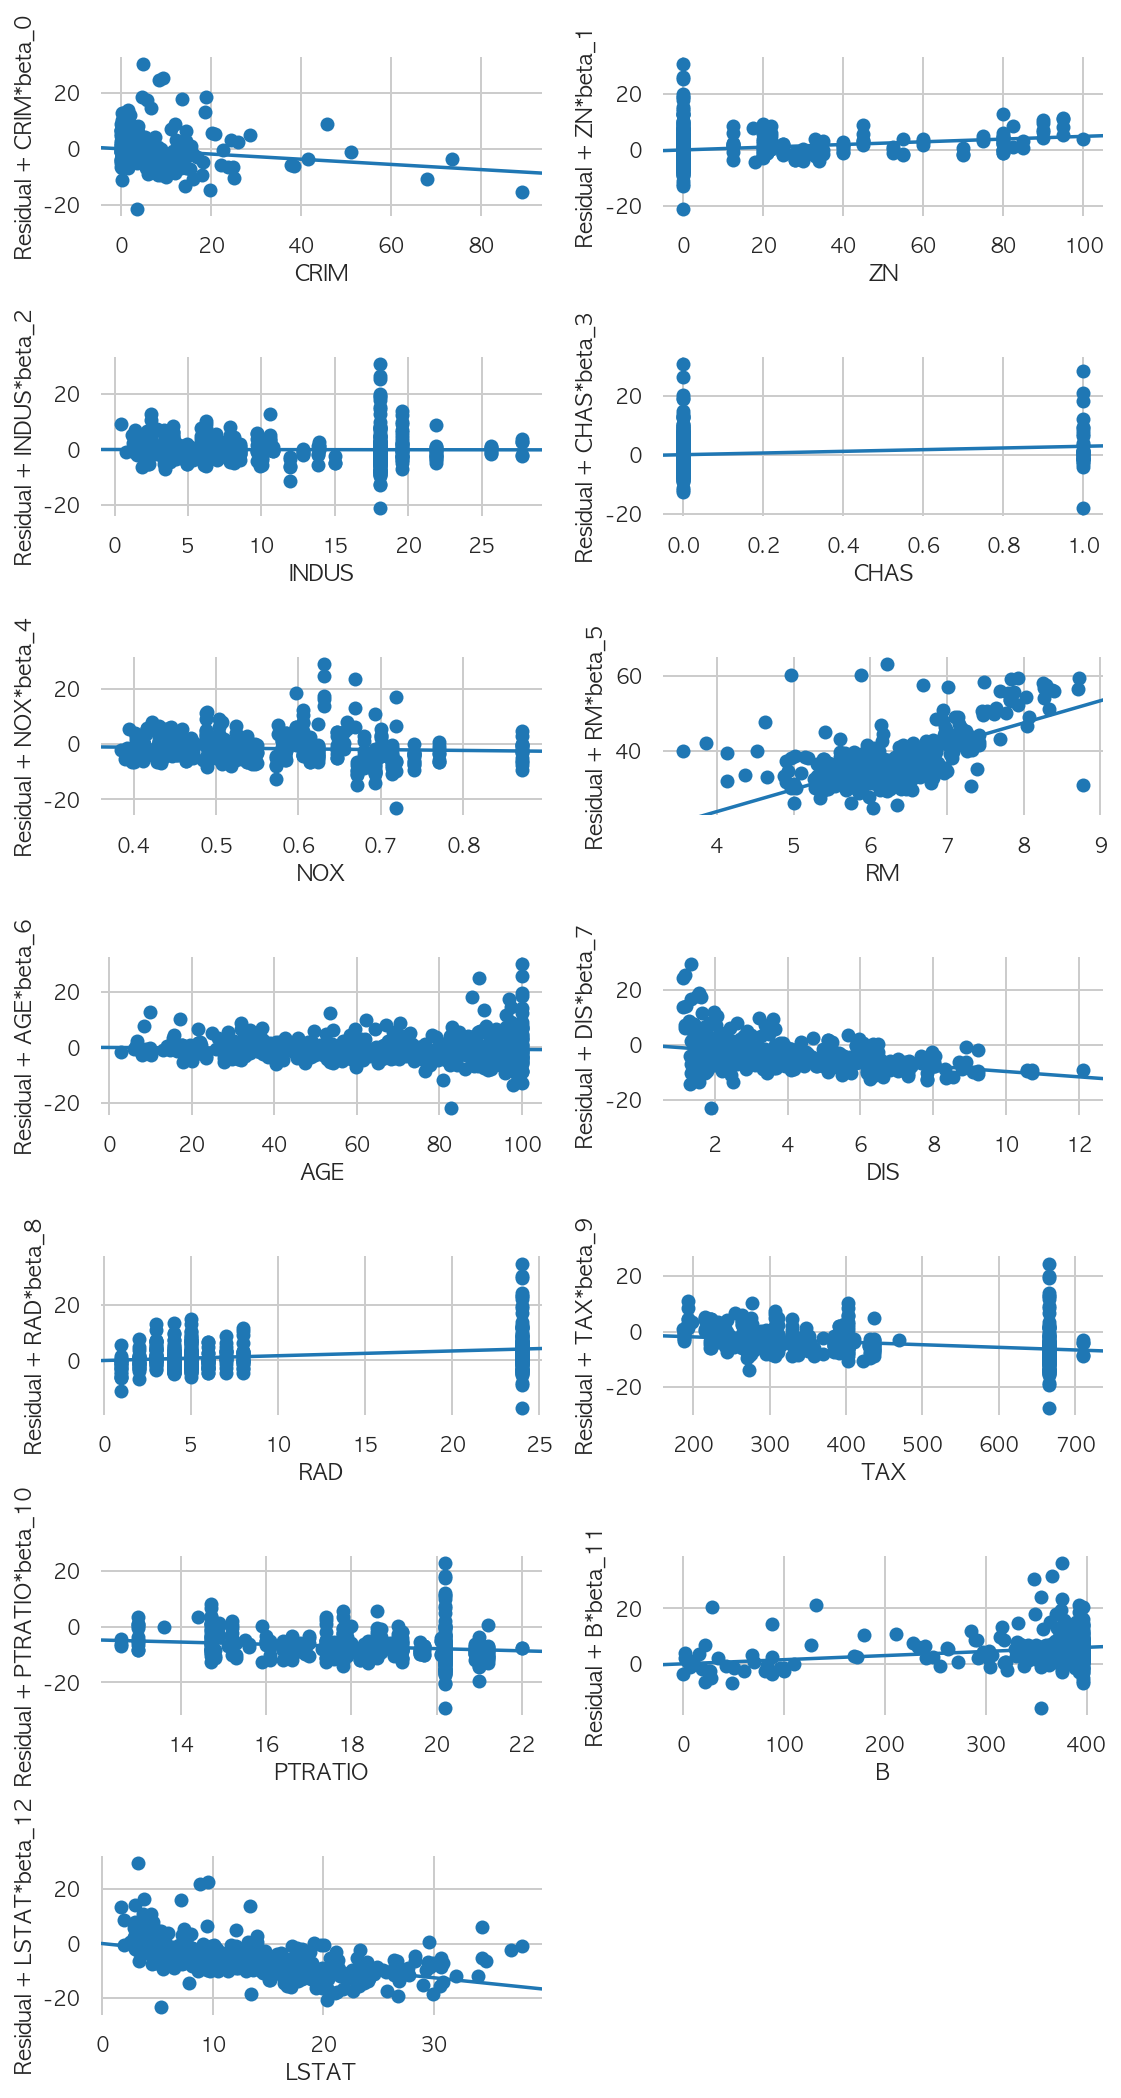

In [43]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

**sm.graphics.plot_regress_exog**

 - result : 회귀분석 결과 객체
 - exog_idx : 분석 대상이 되는 독립변수 문자열

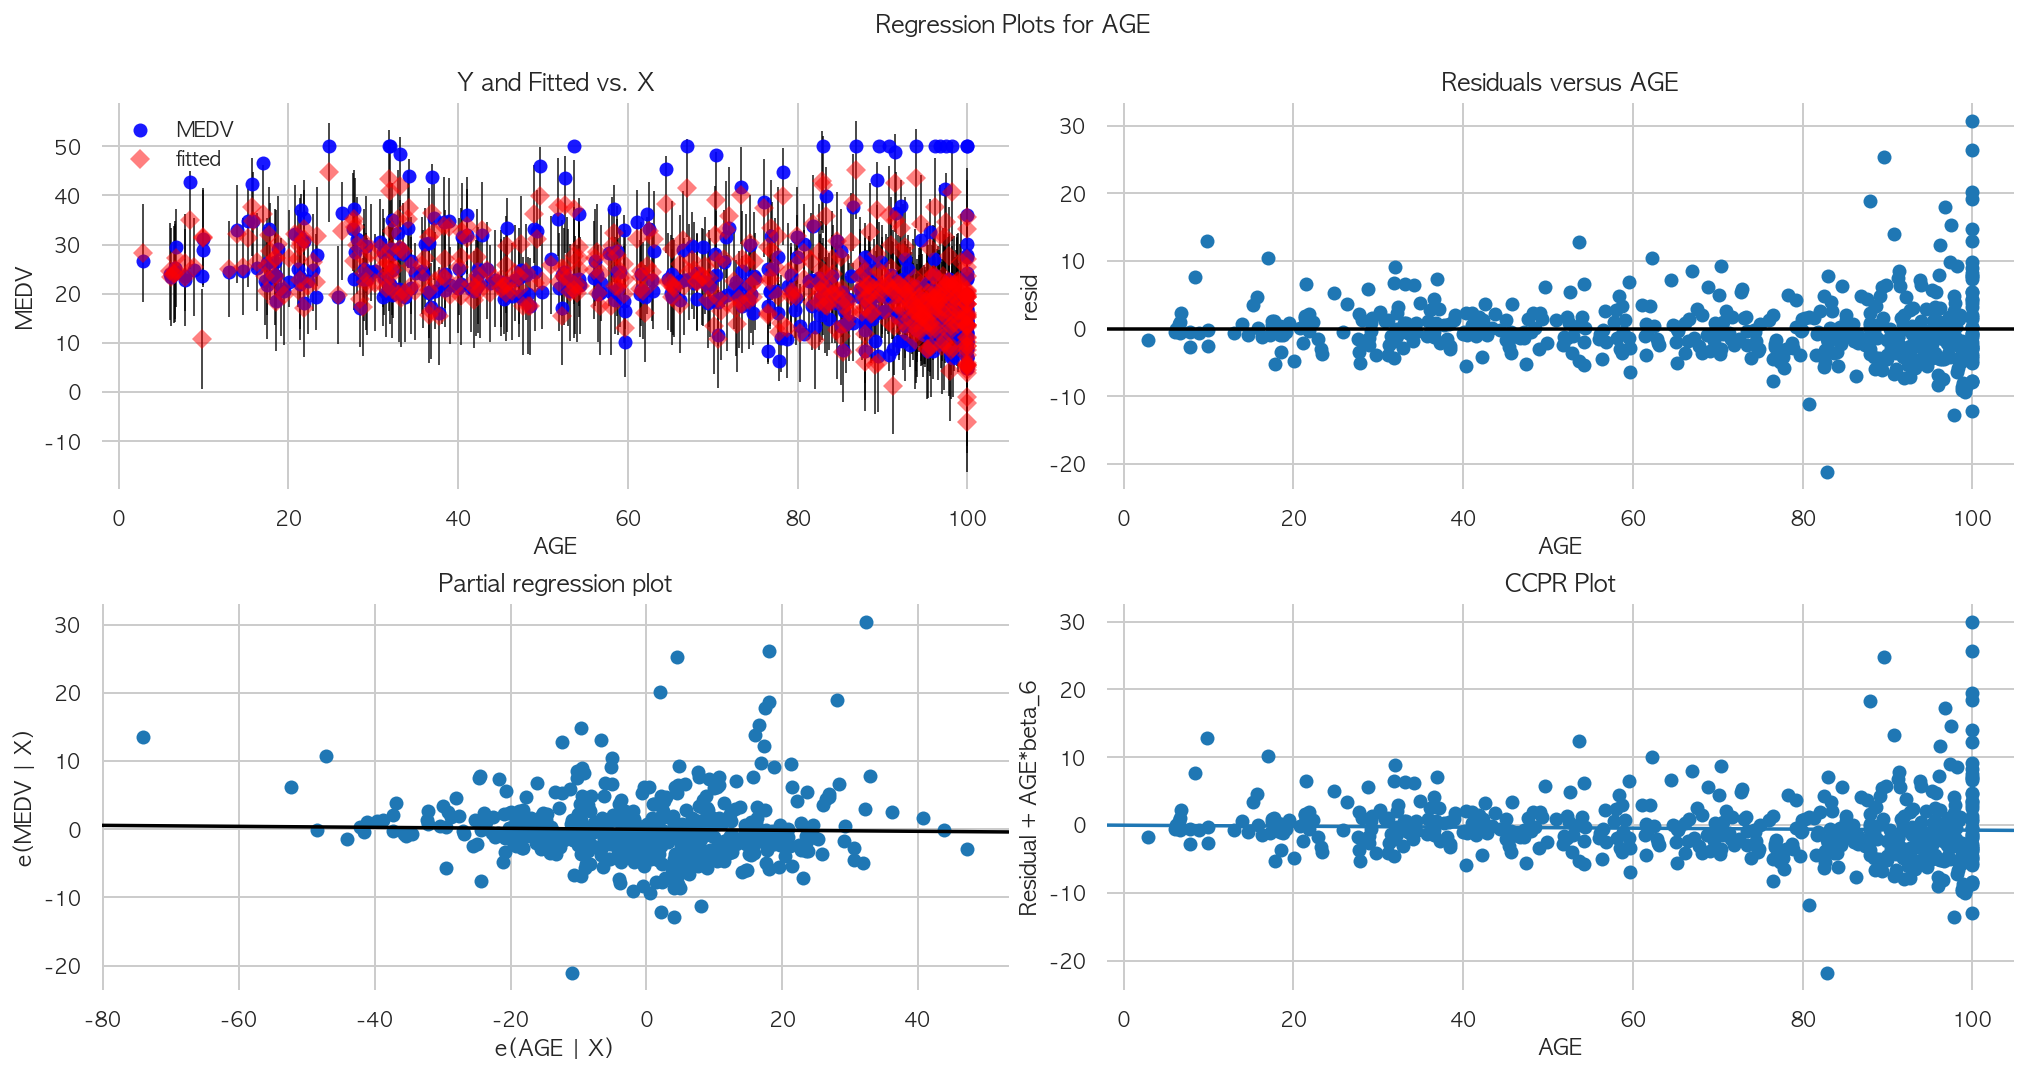

In [45]:
fig = sm.graphics.plot_regress_exog(result_boston, "AGE")
plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.show()